### Imports

In [126]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

from pandas.api.types import is_string_dtype, is_numeric_dtype

### Concatenate 10 datasets

In [19]:
# current directory
path = os.getcwd()

#show all files
files = os.listdir(path)
files

['.ipynb_checkpoints',
 'Data Cleaning.ipynb',
 'real_estate_albuquerque.xlsx',
 'real_estate_colorado.xlsx',
 'real_estate_indianapolis.xlsx',
 'real_estate_las_vegas.xlsx',
 'real_estate_miami.xlsx',
 'real_estate_new_york.xlsx',
 'real_estate_philadelphia.xlsx',
 'real_estate_san_diego.xlsx',
 'real_estate_san_francisco.xlsx',
 'real_estate_washington.xlsx']

In [20]:
files_needed = ['real_estate_albuquerque.xlsx',
 'real_estate_colorado.xlsx',
 'real_estate_indianapolis.xlsx',
 'real_estate_las_vegas.xlsx',
 'real_estate_miami.xlsx',
 'real_estate_new_york.xlsx',
 'real_estate_philadelphia.xlsx',
 'real_estate_san_diego.xlsx',
 'real_estate_san_francisco.xlsx',
 'real_estate_washington.xlsx'
]

In [178]:
# intialize Dataframe 

df_combined = pd.DataFrame()

for f in files_needed:
    df_combined = df_combined.append(pd.read_excel(f,'Sheet1',engine='openpyxl'))

In [179]:
df_combined.shape

(10012, 8)

## Data Cleaning Process

### 1. Check for missing Data


In [180]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10012 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     10010 non-null  object
 1   Bedrooms    9491 non-null   object
 2   Bathrooms   9343 non-null   object
 3   Area        9122 non-null   object
 4   Year Build  9536 non-null   object
 5   Parking     9424 non-null   object
 6   Price       10004 non-null  object
 7   Location    10012 non-null  object
dtypes: object(8)
memory usage: 704.0+ KB


In [181]:
# check for atleast one missing value in the row
df_combined[df_combined.isna().any(axis=1)]

,Address,Bedrooms,Bathrooms,Area,Year Build,Parking,Price,Location
262,7112 Pan American Fwy NE #261,2 Beds,2 Baths,NaN,2000,No Info,"$71,775",Albuquerque
282,Pajarito Mesa,NaN,NaN,NaN,NaN,NaN,"$13,000",Albuquerque
302,2115 Gold Ave SE,1 Bed,1 Bath,NaN,Year Built,NaN,"$697,000",Albuquerque
389,1033 Forrester Ave NW,Studio,NaN,600 sqft,1977,No Info,"$202,500",Albuquerque
466,200 Hermosa Dr NE,NaN,1 Bath,"11,369 sqft",1977,No Info,"$2,080,000",Albuquerque
...,...,...,...,...,...,...,...,...
941,1505 Erie St SE,NaN,NaN,NaN,NaN,NaN,"$60,000",Washington
948,1507 Erie St SE,NaN,NaN,NaN,NaN,NaN,"$60,000",Washington
955,950 25th St NW #714N,2 Beds,1 Bath,NaN,1966,Open Parking,"$350,000",Washington
973,1711 Massachusetts Ave NW #P52,Studio,NaN,NaN,1950,1 Car Garage,"$45,000",Washington


<AxesSubplot:>

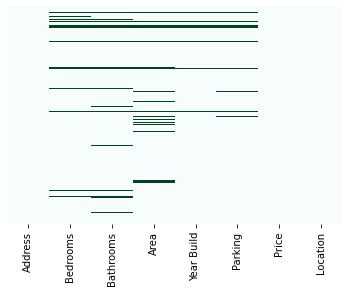

In [182]:
sns.heatmap(df_combined.isna(), yticklabels=False, cbar=False, cmap='BuGn')

In [183]:
df_combined = df_combined.dropna()

In [184]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8916 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     8916 non-null   object
 1   Bedrooms    8916 non-null   object
 2   Bathrooms   8916 non-null   object
 3   Area        8916 non-null   object
 4   Year Build  8916 non-null   object
 5   Parking     8916 non-null   object
 6   Price       8916 non-null   object
 7   Location    8916 non-null   object
dtypes: object(8)
memory usage: 626.9+ KB


### 2. Reset/Change Index


In [185]:
df_combined = df_combined.reset_index(drop=True)

In [186]:
df_combined

,Address,Bedrooms,Bathrooms,Area,Year Build,Parking,Price,Location
0,6728 Conrad Ave NW,3 Beds,2 Baths,"1,682 sqft",1993,2 Car Garage,"$263,000",Albuquerque
1,1119 Aztec Rd NW,3 Beds,2 Baths,"1,467 sqft",1936,No Info,"$299,000",Albuquerque
2,8914 Greenarbor Rd NE,5 Beds,3 Baths,"2,738 sqft",1994,3 Car Garage,"$465,000",Albuquerque
3,4700 Westridge Pl NE,3 Beds,3 Baths,"2,488 sqft",1966,Garage,"$360,000",Albuquerque
4,11640 Woodmar Ln NE,4 Beds,3 Baths,"3,572 sqft",1989,3 Car Garage,"$650,000",Albuquerque
...,...,...,...,...,...,...,...,...
8911,Home 114 Plan in City Homes by McWilliams Ballard,2 Beds,3 Baths,"1,220 sqft",2021,Garage,"$789,900+",Washington
8912,1311 E St SE #35,3 Beds,4 Baths,"2,420 sqft",2021,1 Car Garage,"$1,495,000",Washington
8913,2310 Ashmead Pl NW #104,1 Bed,1 Bath,433 sqft,1921,Open Parking,"$297,500",Washington
8914,2127 California St NW #405,2 Beds,2 Baths,"1,355 sqft",1927,Open Parking,"$949,000",Washington


### 3. Check for Outliers and Doubles


In [187]:
# check for duplicates
df_combined.duplicated().sum()

6

In [188]:
df_combined.loc[df_combined.duplicated(), :]

,Address,Bedrooms,Bathrooms,Area,Year Build,Parking,Price,Location
581,3600 Central Ave SE #109,2 Beds,2 Baths,"1,207 sqft",2018,1 Car Garage,"$419,900",Albuquerque
4138,4840 Macarthur Blvd NW #607,2 Beds,1 Bath,807 sqft,1959,No Info,"$375,000",Miami
5015,2 Park Pl #PAVILION-A,5 Beds,6 Baths,"6,711 sqft",1913,No Info,"$25,950,000",New York
5023,224 Lefferts Ave #1,1 Bed,1 Bath,650 sqft,No Info,No Info,"$170,000",New York
7753,818 Van Ness Ave #406,2 Beds,2 Baths,994 sqft,2008,Garage,"$1,099,000",San Francisco
8602,4840 Macarthur Blvd NW #607,2 Beds,1 Bath,807 sqft,1959,No Info,"$375,000",Washington


In [189]:
df_combined = df_combined.drop_duplicates()

In [190]:
df_combined.head()

,Address,Bedrooms,Bathrooms,Area,Year Build,Parking,Price,Location
0,6728 Conrad Ave NW,3 Beds,2 Baths,"1,682 sqft",1993,2 Car Garage,"$263,000",Albuquerque
1,1119 Aztec Rd NW,3 Beds,2 Baths,"1,467 sqft",1936,No Info,"$299,000",Albuquerque
2,8914 Greenarbor Rd NE,5 Beds,3 Baths,"2,738 sqft",1994,3 Car Garage,"$465,000",Albuquerque
3,4700 Westridge Pl NE,3 Beds,3 Baths,"2,488 sqft",1966,Garage,"$360,000",Albuquerque
4,11640 Woodmar Ln NE,4 Beds,3 Baths,"3,572 sqft",1989,3 Car Garage,"$650,000",Albuquerque


### 4. Change Price Column
rename price column and update with existing dataframe

In [191]:
df_combined= df_combined.rename(columns={'Price':'Price($)'})
df_combined.tail()

,Address,Bedrooms,Bathrooms,Area,Year Build,Parking,Price($),Location
8911,Home 114 Plan in City Homes by McWilliams Ballard,2 Beds,3 Baths,"1,220 sqft",2021,Garage,"$789,900+",Washington
8912,1311 E St SE #35,3 Beds,4 Baths,"2,420 sqft",2021,1 Car Garage,"$1,495,000",Washington
8913,2310 Ashmead Pl NW #104,1 Bed,1 Bath,433 sqft,1921,Open Parking,"$297,500",Washington
8914,2127 California St NW #405,2 Beds,2 Baths,"1,355 sqft",1927,Open Parking,"$949,000",Washington
8915,1311 Spring Rd NW #1,4 Beds,3 Baths,"1,750 sqft",1919,Open Parking,"$865,000",Washington


In [192]:
#Remove Dollar sign $ in Price
df_combined['Price($)'] = df_combined['Price($)'].str.strip('$')

# Remove comma , in Price
df_combined['Price($)'] = df_combined['Price($)'].str.replace(',', '')

# Remove Plus + in Price
df_combined['Price($)'] = df_combined['Price($)'].str.strip('+')

df_combined.tail()

,Address,Bedrooms,Bathrooms,Area,Year Build,Parking,Price($),Location
8911,Home 114 Plan in City Homes by McWilliams Ballard,2 Beds,3 Baths,"1,220 sqft",2021,Garage,789900,Washington
8912,1311 E St SE #35,3 Beds,4 Baths,"2,420 sqft",2021,1 Car Garage,1495000,Washington
8913,2310 Ashmead Pl NW #104,1 Bed,1 Bath,433 sqft,1921,Open Parking,297500,Washington
8914,2127 California St NW #405,2 Beds,2 Baths,"1,355 sqft",1927,Open Parking,949000,Washington
8915,1311 Spring Rd NW #1,4 Beds,3 Baths,"1,750 sqft",1919,Open Parking,865000,Washington


In [193]:
df_combined.head()


,Address,Bedrooms,Bathrooms,Area,Year Build,Parking,Price($),Location
0,6728 Conrad Ave NW,3 Beds,2 Baths,"1,682 sqft",1993,2 Car Garage,263000,Albuquerque
1,1119 Aztec Rd NW,3 Beds,2 Baths,"1,467 sqft",1936,No Info,299000,Albuquerque
2,8914 Greenarbor Rd NE,5 Beds,3 Baths,"2,738 sqft",1994,3 Car Garage,465000,Albuquerque
3,4700 Westridge Pl NE,3 Beds,3 Baths,"2,488 sqft",1966,Garage,360000,Albuquerque
4,11640 Woodmar Ln NE,4 Beds,3 Baths,"3,572 sqft",1989,3 Car Garage,650000,Albuquerque


### 5. Change Area Column

In [194]:
df_combined= df_combined.rename(columns={'Area':'Area(Sqft)'})
df_combined.tail()

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Build,Parking,Price($),Location
8911,Home 114 Plan in City Homes by McWilliams Ballard,2 Beds,3 Baths,"1,220 sqft",2021,Garage,789900,Washington
8912,1311 E St SE #35,3 Beds,4 Baths,"2,420 sqft",2021,1 Car Garage,1495000,Washington
8913,2310 Ashmead Pl NW #104,1 Bed,1 Bath,433 sqft,1921,Open Parking,297500,Washington
8914,2127 California St NW #405,2 Beds,2 Baths,"1,355 sqft",1927,Open Parking,949000,Washington
8915,1311 Spring Rd NW #1,4 Beds,3 Baths,"1,750 sqft",1919,Open Parking,865000,Washington


In [195]:
# Remove comma , in Area
df_combined['Area(Sqft)'] = df_combined['Area(Sqft)'].str.replace(',', '')

# Remove sqft from Area(Sqft)
df_combined['Area(Sqft)'] = df_combined['Area(Sqft)'].str.strip('sqft')

df_combined.tail()

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Build,Parking,Price($),Location
8911,Home 114 Plan in City Homes by McWilliams Ballard,2 Beds,3 Baths,1220,2021,Garage,789900,Washington
8912,1311 E St SE #35,3 Beds,4 Baths,2420,2021,1 Car Garage,1495000,Washington
8913,2310 Ashmead Pl NW #104,1 Bed,1 Bath,433,1921,Open Parking,297500,Washington
8914,2127 California St NW #405,2 Beds,2 Baths,1355,1927,Open Parking,949000,Washington
8915,1311 Spring Rd NW #1,4 Beds,3 Baths,1750,1919,Open Parking,865000,Washington


### 6. Change in Bedrooms and Bathrooms Columns

In [196]:
df_combined[df_combined['Bedrooms'] == "Studio"].head()

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Build,Parking,Price($),Location
205,401 High St SE #6,Studio,1 Bath,788,2005,No Info,143500,Albuquerque
250,Address Not Disclosed,Studio,2 Baths,900,1955,No Info,110000,Albuquerque
399,401 Central Ave NE #305,Studio,2 Baths,1332,2004,No Info,235000,Albuquerque
432,301 Central Ave NE #306,Studio,1 Bath,950,1914,No Info,199000,Albuquerque
536,300 Tijeras Ave NE #311,Studio,2 Baths,1895,2005,No Info,309000,Albuquerque


In [197]:
#Remove Beds
df_combined['Bedrooms'] = df_combined['Bedrooms'].str.strip(' Beds')

#Remove Baths
df_combined['Bathrooms'] = df_combined['Bathrooms'].str.strip(' Baths')

In [198]:
# Remove Studio from Bedrooms columns

df_combined['Bedrooms'] = df_combined['Bedrooms'].apply(lambda x: 1 if 'Studio' in x else x)

In [199]:
df_combined.head()

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Build,Parking,Price($),Location
0,6728 Conrad Ave NW,3,2,1682,1993,2 Car Garage,263000,Albuquerque
1,1119 Aztec Rd NW,3,2,1467,1936,No Info,299000,Albuquerque
2,8914 Greenarbor Rd NE,5,3,2738,1994,3 Car Garage,465000,Albuquerque
3,4700 Westridge Pl NE,3,3,2488,1966,Garage,360000,Albuquerque
4,11640 Woodmar Ln NE,4,3,3572,1989,3 Car Garage,650000,Albuquerque


### 7. Clean/Update Parking Column

In [200]:
df_combined['Parking'].value_counts()

Garage                1983
No Info               1648
Open Parking          1367
2 Car Garage          1343
1 Car Garage           659
3 Car Garage           498
None                   264
1 Parking Spaces       241
Attached Garage        225
4 Car Garage           131
1 Carport Spaces        97
1 Open Spaces           85
2 Parking Spaces        73
2 Open Spaces           52
2 Carport Spaces        34
5 Car Garage            28
0 Open Spaces           27
6 Car Garage            25
Carport                 23
4 Parking Spaces        15
3 Open Spaces           13
4 Open Spaces           12
3 Parking Spaces        11
8 Car Garage             8
5 Open Spaces            7
5 Parking Spaces         5
8 Parking Spaces         4
3 Carport Spaces         4
10 Car Garage            3
7 Car Garage             3
4 Carport Spaces         3
59 Car Garage            2
11 Car Garage            2
5 Carport Spaces         2
9 Car Garage             2
207 Parking Spaces       2
3.5 Car Garage           2
6

In [201]:
df_combined['Parking'] = df_combined['Parking'].apply(lambda x: 'yes' if 'Garage' in x or 'Carport' in x or 'Car' in x or 'Open' in x
                            else 'no')

In [202]:
df_combined['Parking'].value_counts()

yes    6645
no     2265
Name: Parking, dtype: int64

### Change Numbers to Integers 

#### Bedrooms

In [203]:
df_combined['Bedrooms'] = df_combined['Bedrooms'].astype(int)

In [204]:
is_numeric_dtype(df_combined['Bedrooms'])

True

#### Bathrooms

In [205]:
df_combined['Bathrooms'] = df_combined['Bathrooms'].astype(int)

In [206]:
is_numeric_dtype(df_combined['Bathrooms'])

True

#### Area in Sqft

In [207]:
df_combined['Area(Sqft)'] = df_combined['Area(Sqft)'].astype(int)

In [208]:
is_numeric_dtype(df_combined['Bathrooms'])

True

#### Year Built

In [209]:
is_numeric_dtype(df_combined['Year Build'])

False

In [210]:
df_combined[df_combined['Year Build'] == 'No Info']

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Build,Parking,Price($),Location
23,824 Eroy St SW,2,1,1065,No Info,no,170000,Albuquerque
35,3604 Garcia St NE,3,2,1355,No Info,yes,225000,Albuquerque
85,6500 Kimmick Dr NW,4,3,3085,No Info,yes,850000,Albuquerque
102,1101 Barelas Rd SW,3,4,1522,No Info,yes,165000,Albuquerque
116,5513 Arvilla Ave NE,4,3,1914,No Info,yes,340000,Albuquerque
...,...,...,...,...,...,...,...,...
7885,400 Bristol Ct #301,2,3,1909,No Info,no,2883000,San Francisco
7887,2853 Folsom St,2,3,1630,No Info,no,1795000,San Francisco
7939,1069 Capp St,5,4,3737,No Info,yes,1995000,San Francisco
7947,3131 Pierce St #Townhouse,2,3,1731,No Info,no,2495000,San Francisco


In [211]:
# 4) convert into str
df_combined['Year Build'] = df_combined['Year Build'].astype(str)

In [213]:
# 5) unique value
df_combined['Year Build'].value_counts()

2021    710
1900    316
1920    285
1925    262
2006    175
       ... 
1881      1
1872      1
1833      1
1858      1
1882      1
Name: Year Build, Length: 270, dtype: int64

In [214]:
#6) change float values

df_combined['Year Build'] = df_combined['Year Build'].apply(lambda x: x.replace('.0','') if '.0' in x else x)

In [215]:
# 7) lambda function to remove No Info with 0
df_combined['Year Build'] = df_combined['Year Build'].apply(lambda x: 0 if 'No Info' in x else x)

In [218]:
# 8)
df_combined['Year Build'] = df_combined['Year Build'].astype(int)

#### Price in $

In [219]:
df_combined['Price($)'] = df_combined['Price($)'].astype(int)

In [226]:
df_combined.describe()

,Bedrooms,Bathrooms,Area(Sqft),Year Build,Price($)
count,8910.000000,8910.000000,8910.000000,8910.000000,8.910000e+03
mean,3.212458,2.765432,2397.853984,1934.712570,1.394744e+06
std,1.704148,1.634450,6347.192175,253.012671,4.525639e+06
min,1.000000,1.000000,1.000000,0.000000,1.000000e+00
25%,2.000000,2.000000,1144.000000,1927.000000,3.300000e+05
50%,3.000000,2.000000,1721.500000,1970.000000,5.495000e+05
75%,4.000000,3.000000,2683.500000,2004.000000,9.980000e+05
max,84.000000,17.000000,430000.000000,2022.000000,1.690000e+08


### New Column 'price/sqft'

In [227]:
df_combined['price/sqft'] = df_combined['Price($)']/df_combined['Area(Sqft)']

In [228]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Build,Parking,Price($),Location,price/sqft
0,6728 Conrad Ave NW,3,2,1682,1993,yes,263000,Albuquerque,156.361474
1,1119 Aztec Rd NW,3,2,1467,1936,no,299000,Albuquerque,203.817314
2,8914 Greenarbor Rd NE,5,3,2738,1994,yes,465000,Albuquerque,169.831994
3,4700 Westridge Pl NE,3,3,2488,1966,yes,360000,Albuquerque,144.694534
4,11640 Woodmar Ln NE,4,3,3572,1989,yes,650000,Albuquerque,181.970885
...,...,...,...,...,...,...,...,...,...
8911,Home 114 Plan in City Homes by McWilliams Ballard,2,3,1220,2021,yes,789900,Washington,647.459016
8912,1311 E St SE #35,3,4,2420,2021,yes,1495000,Washington,617.768595
8913,2310 Ashmead Pl NW #104,1,1,433,1921,yes,297500,Washington,687.066975
8914,2127 California St NW #405,2,2,1355,1927,yes,949000,Washington,700.369004


In [230]:
df_combined['price/sqft'] = df_combined['price/sqft'].round(2)

In [231]:
df_combined

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Build,Parking,Price($),Location,price/sqft
0,6728 Conrad Ave NW,3,2,1682,1993,yes,263000,Albuquerque,156.36
1,1119 Aztec Rd NW,3,2,1467,1936,no,299000,Albuquerque,203.82
2,8914 Greenarbor Rd NE,5,3,2738,1994,yes,465000,Albuquerque,169.83
3,4700 Westridge Pl NE,3,3,2488,1966,yes,360000,Albuquerque,144.69
4,11640 Woodmar Ln NE,4,3,3572,1989,yes,650000,Albuquerque,181.97
...,...,...,...,...,...,...,...,...,...
8911,Home 114 Plan in City Homes by McWilliams Ballard,2,3,1220,2021,yes,789900,Washington,647.46
8912,1311 E St SE #35,3,4,2420,2021,yes,1495000,Washington,617.77
8913,2310 Ashmead Pl NW #104,1,1,433,1921,yes,297500,Washington,687.07
8914,2127 California St NW #405,2,2,1355,1927,yes,949000,Washington,700.37


### Check for Outliers

In [232]:
df_combined.describe()

,Bedrooms,Bathrooms,Area(Sqft),Year Build,Price($),price/sqft
count,8910.000000,8910.000000,8910.000000,8910.000000,8.910000e+03,8910.000000
mean,3.212458,2.765432,2397.853984,1934.712570,1.394744e+06,589.047282
std,1.704148,1.634450,6347.192175,253.012671,4.525639e+06,6036.639110
min,1.000000,1.000000,1.000000,0.000000,1.000000e+00,0.000000
25%,2.000000,2.000000,1144.000000,1927.000000,3.300000e+05,192.010000
50%,3.000000,2.000000,1721.500000,1970.000000,5.495000e+05,335.825000
75%,4.000000,3.000000,2683.500000,2004.000000,9.980000e+05,626.440000
max,84.000000,17.000000,430000.000000,2022.000000,1.690000e+08,560000.000000


In [235]:
df_combined.loc[df_combined['price/sqft'] == 560000 ] # 1 Sqft not possible 

,Address,Bedrooms,Bathrooms,Area(Sqft),Year Build,Parking,Price($),Location,price/sqft
5170,3069 Heath Ave,3,2,1,1899,no,560000,New York,560000.0


In [236]:
df_combined = df_combined.drop(5170)

In [239]:
df_combined.shape

(8909, 9)

### Save in Excel

In [242]:
df_combined.to_excel('cleaned_data.xlsx', index=False)